In [1]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = torch.rand(1000)*6*math.pi
y_train = np.sin(x_train) + np.arctan(x_train)

In [3]:
x_test = torch.rand(1000)*6*math.pi
x_test.numpy().sort()
y_test = np.sin(x_test) + np.arctan(x_test)

In [4]:
def loss(pred, target):
    ans = (pred - target)**2
    return ans.mean()

In [5]:
def predict(net, x, y):
    y_pred = net.forward(x).detach()
    plt.clf()
    plt.plot(x.numpy(), y.numpy(), 'o', c='b', label='Ground truth')
    plt.plot(x.numpy(), y_pred.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

In [6]:
x_train = x_train.unsqueeze(1)
y_train = y_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
y_test = y_test.unsqueeze(1)

In [7]:
class SygmNetwork(torch.nn.Module):
    def __init__(self, hidden_neurons):
        super(SygmNetwork, self).__init__()
        # 1 слой, принимающий сигнал
        self.fc1 = torch.nn.Linear(1, hidden_neurons)
        # функция сигмоиды для первого слоя
        self.act1 = torch.nn.Sigmoid()
        #self.act2 = torch.nn.Sigmoid()
        # 3 функция активации для выходного слоя
        self.fc3 = torch.nn.Linear(hidden_neurons, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc3(x)
        return x

In [8]:
class ReluNetwork(torch.nn.Module):
    def __init__(self, hidden_neurons):
        super(ReluNetwork, self).__init__()
        # 1 слой, принимающий сигнал
        self.fc1=torch.nn.Linear(1, hidden_neurons)
        # функция сигмоиды для первого слоя
        self.act1=torch.nn.ReLU()
        self.fc2=torch.nn.Linear(hidden_neurons, hidden_neurons)
        self.act2=torch.nn.ReLU()
        #self.act2 = torch.nn.Sigmoid()
        # 3 функция активации для выходного слоя
        self.fc3=torch.nn.Linear(hidden_neurons, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

In [9]:
class TanhNetwork(torch.nn.Module):
    def __init__(self, hidden_neurons):
        super(TanhNetwork, self).__init__()
        # 1 слой, принимающий сигнал
        self.fc1=torch.nn.Linear(1, hidden_neurons)
        # функция сигмоиды для первого слоя
        self.act1=torch.nn.Tanh()
        #self.act2 = torch.nn.Sigmoid()
        # 3 функция активации для выходного слоя
        self.fc3=torch.nn.Linear(hidden_neurons, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc3(x)
        return x

tensor(1.9391, grad_fn=<PowBackward0>)


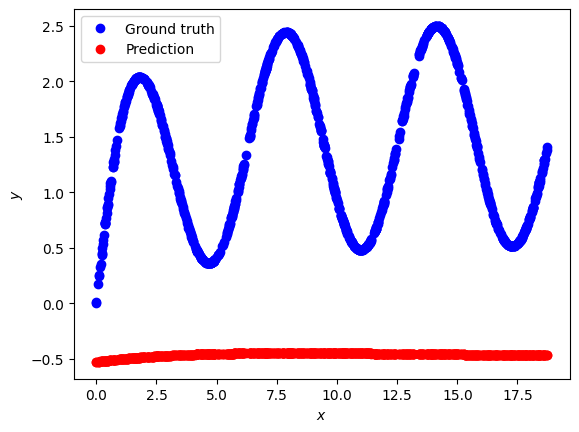

tensor(0.0544, grad_fn=<PowBackward0>)


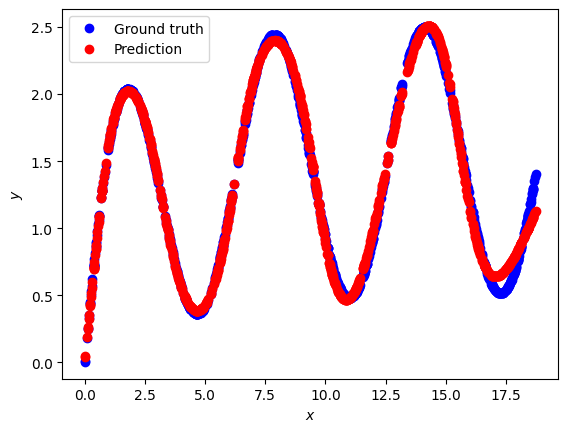

tensor(0.0250, grad_fn=<PowBackward0>)


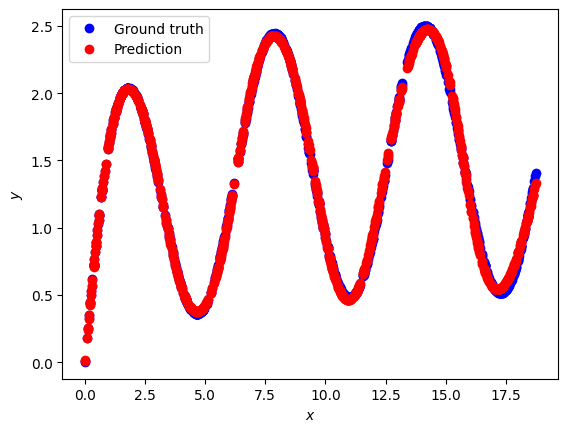

tensor(0.0141, grad_fn=<PowBackward0>)


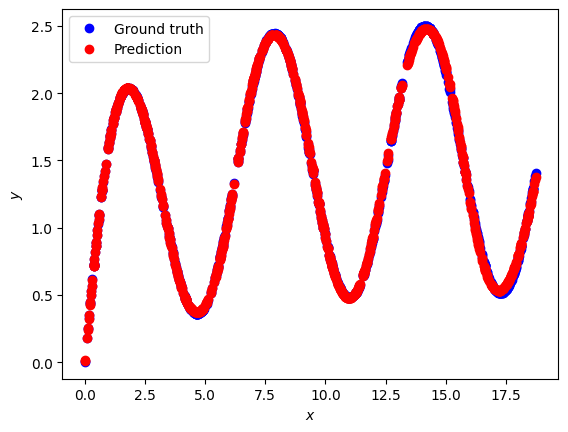

tensor(0.0301, grad_fn=<PowBackward0>)


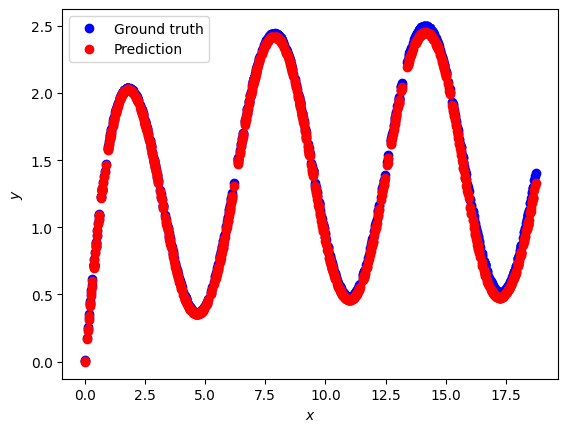

tensor(0.0070, grad_fn=<PowBackward0>)


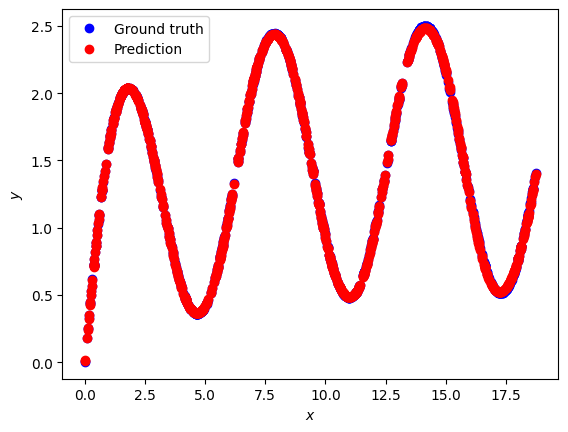

tensor(0.0061, grad_fn=<PowBackward0>)


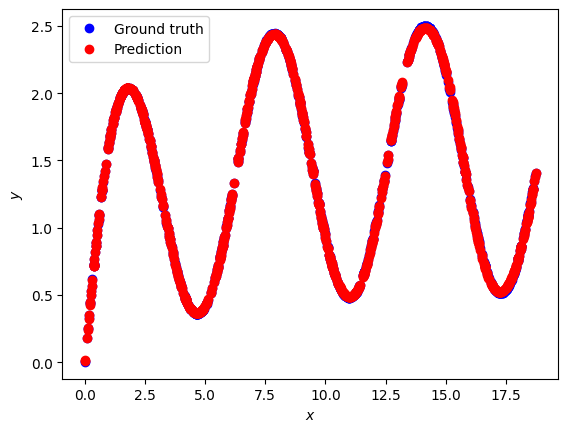

tensor(0.0057, grad_fn=<PowBackward0>)


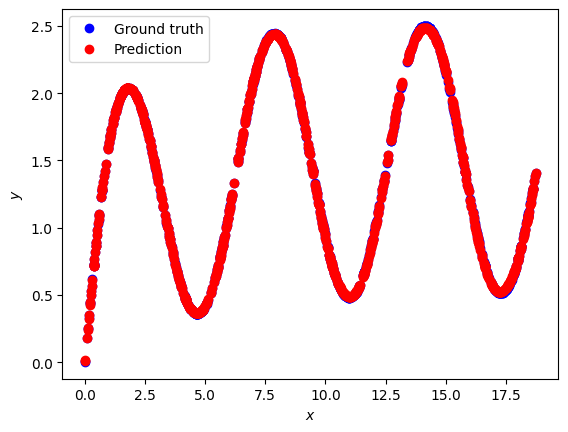

tensor(0.0056, grad_fn=<PowBackward0>)


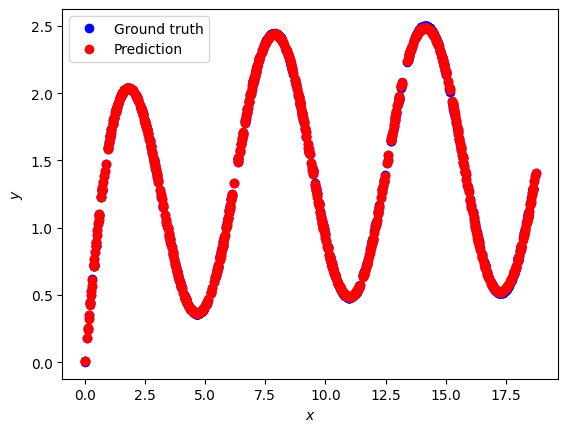

tensor(0.0056, grad_fn=<PowBackward0>)


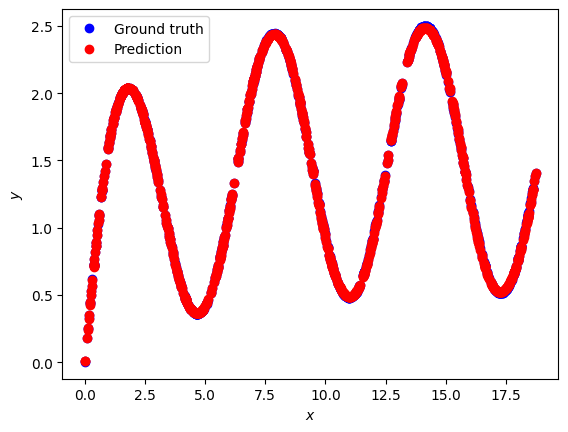

tensor(0.0053, grad_fn=<PowBackward0>)


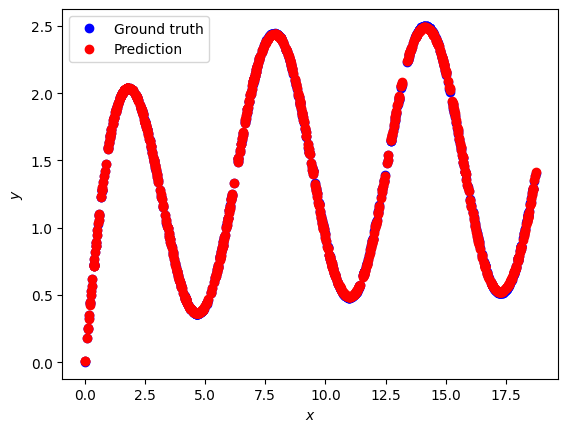

In [18]:
sygm_network = SygmNetwork(12)
optimizer = torch.optim.Adam(sygm_network.parameters(), 0.01)
for i in range(50001):
    optimizer.zero_grad()
    y_pred = sygm_network.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if(i % 5000 == 0): #периодическое сохранение графиков
        y_pred = sygm_network.forward(x_test)
        print((((y_pred - y_test)**2).mean())**0.5)
        predict(sygm_network, x_test, y_test)
        plt.savefig("mygraph-%d-sigmoid05.png"%i)
        plt.show()

tensor(1.6321, grad_fn=<PowBackward0>)


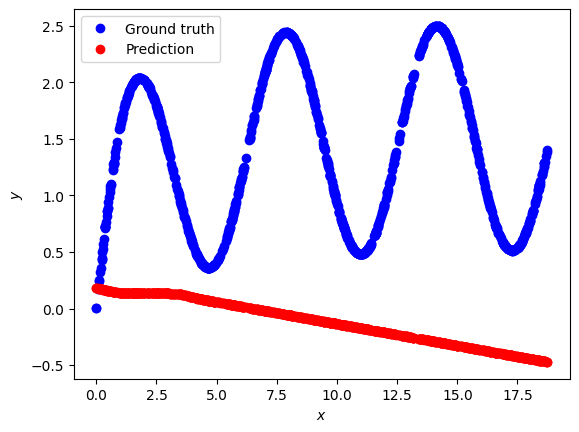

tensor(0.2573, grad_fn=<PowBackward0>)


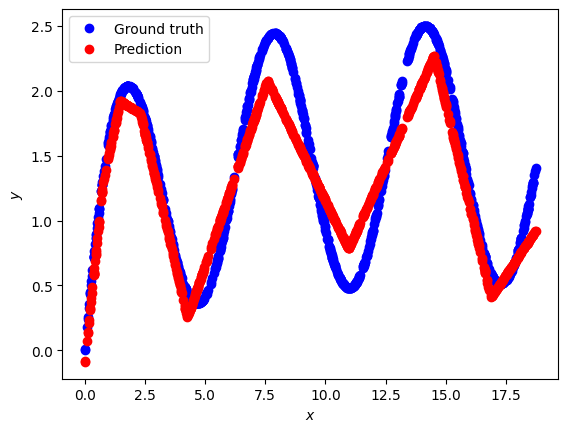

tensor(0.0788, grad_fn=<PowBackward0>)


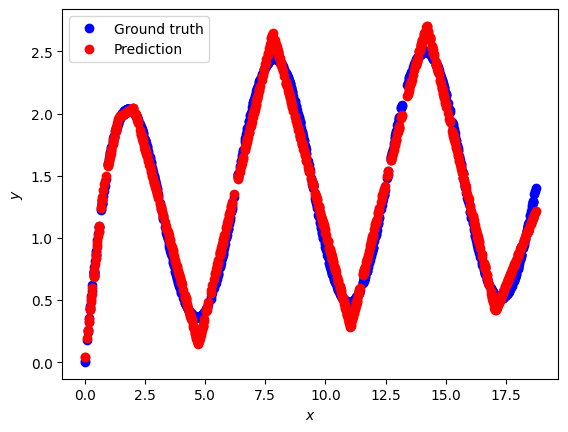

tensor(0.0888, grad_fn=<PowBackward0>)


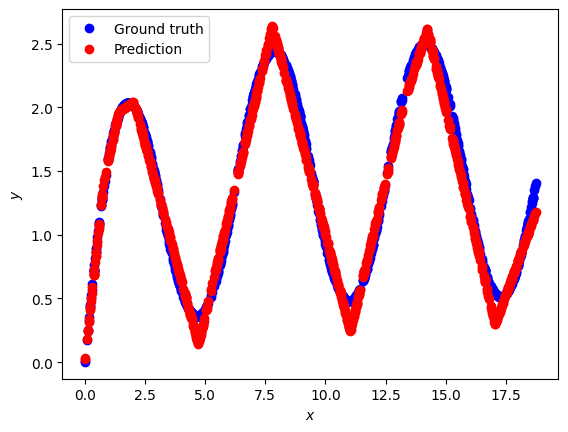

tensor(0.0760, grad_fn=<PowBackward0>)


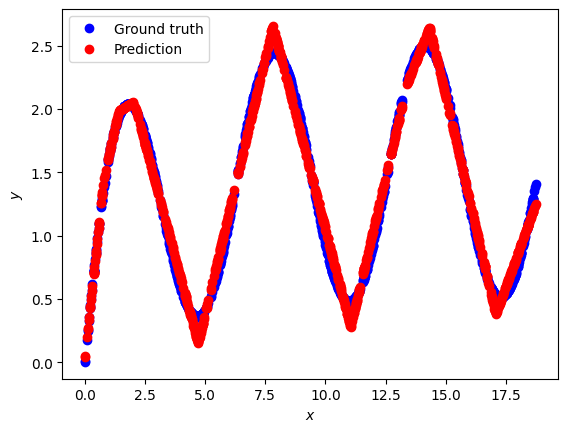

tensor(0.0742, grad_fn=<PowBackward0>)


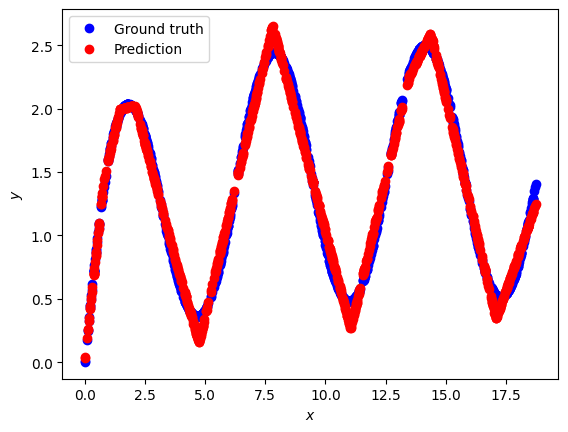

tensor(0.0981, grad_fn=<PowBackward0>)


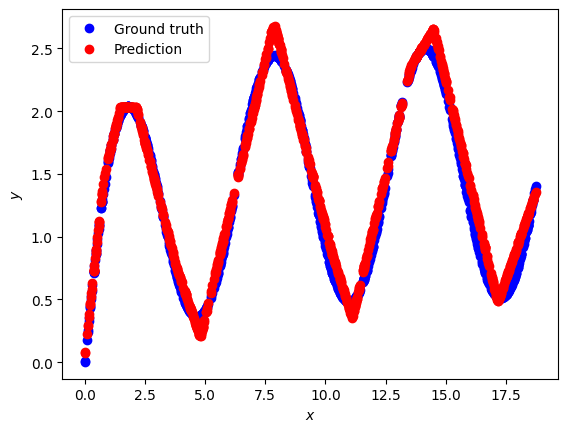

tensor(0.0638, grad_fn=<PowBackward0>)


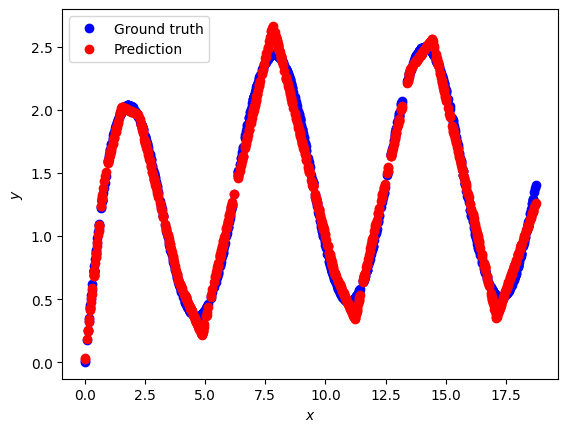

tensor(0.0612, grad_fn=<PowBackward0>)


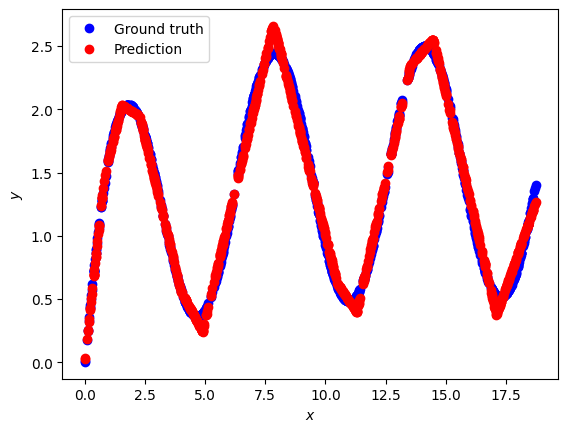

tensor(0.1008, grad_fn=<PowBackward0>)


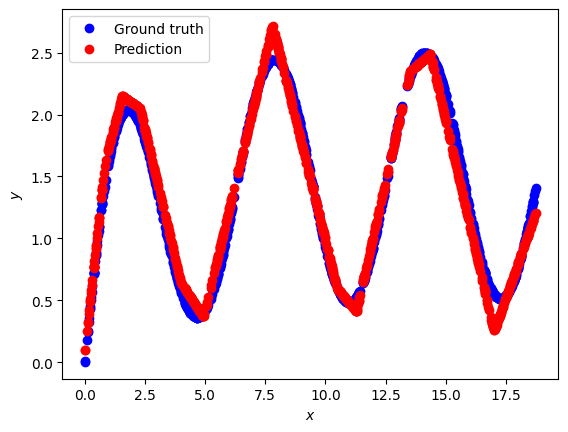

tensor(0.0601, grad_fn=<PowBackward0>)


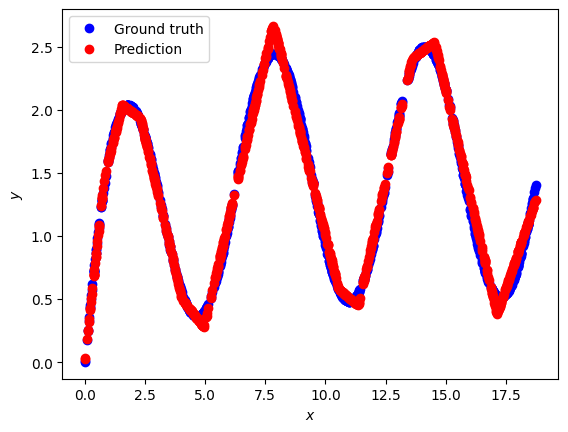

In [25]:
relu_network = ReluNetwork(12)
optimizer = torch.optim.Adam(relu_network.parameters(), 0.02)
for i in range(50001):
    optimizer.zero_grad()
    y_pred = relu_network.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if(i%5000==0): #периодическое сохранение графиков
        y_pred = relu_network.forward(x_test)
        print((((y_pred-y_test)**2).mean())**0.5)
        predict(relu_network, x_test, y_test)
        plt.savefig("mygraph-%d-relu.png"%i)
        plt.show()

tensor(0.9096, grad_fn=<PowBackward0>)


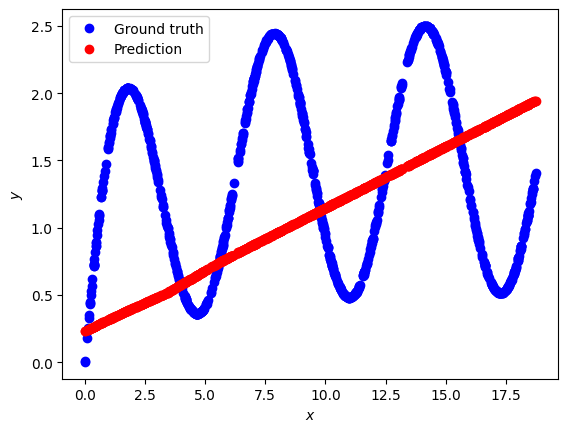

tensor(0.5190, grad_fn=<PowBackward0>)


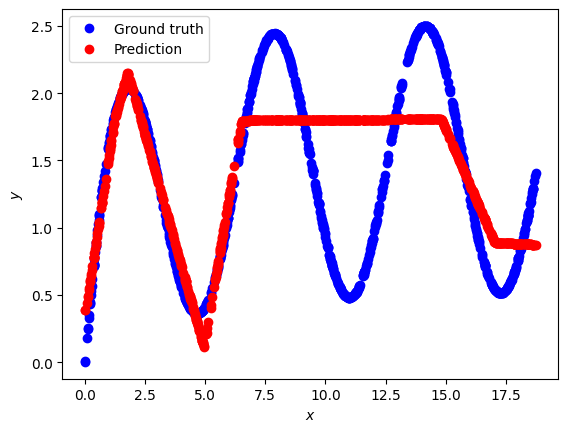

tensor(0.5106, grad_fn=<PowBackward0>)


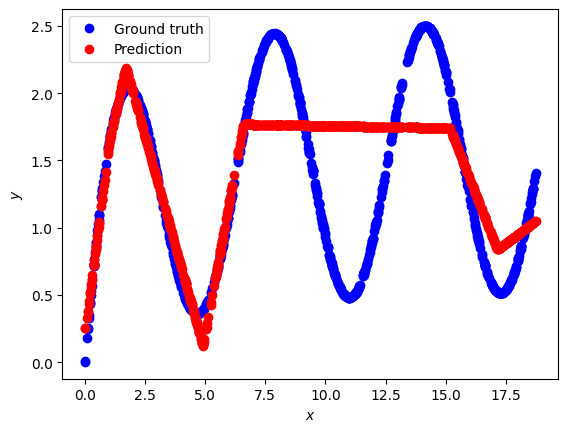

tensor(0.5067, grad_fn=<PowBackward0>)


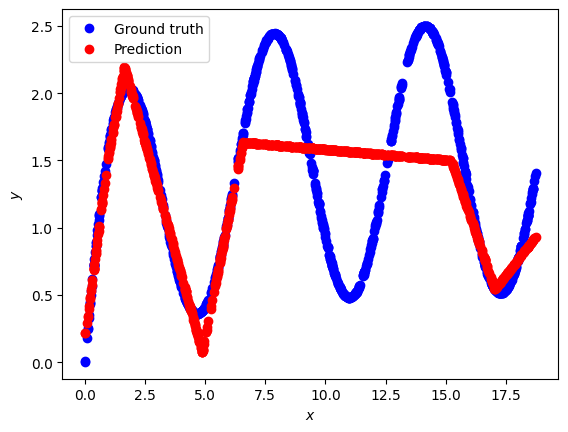

tensor(0.5002, grad_fn=<PowBackward0>)


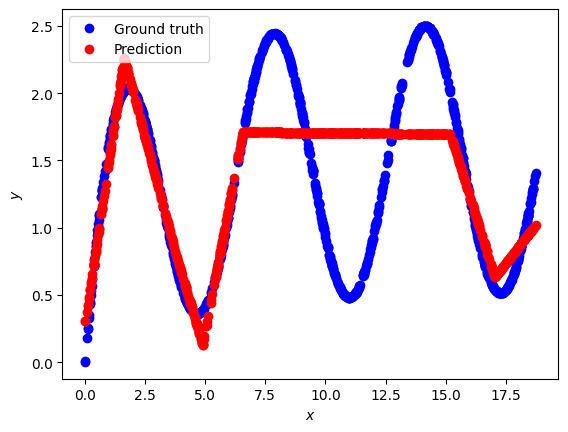

tensor(0.2217, grad_fn=<PowBackward0>)


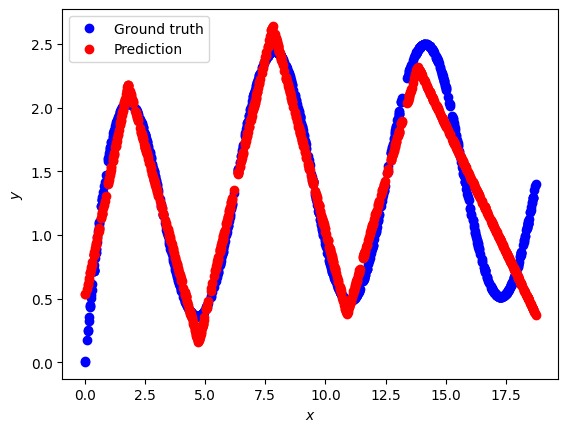

tensor(0.2163, grad_fn=<PowBackward0>)


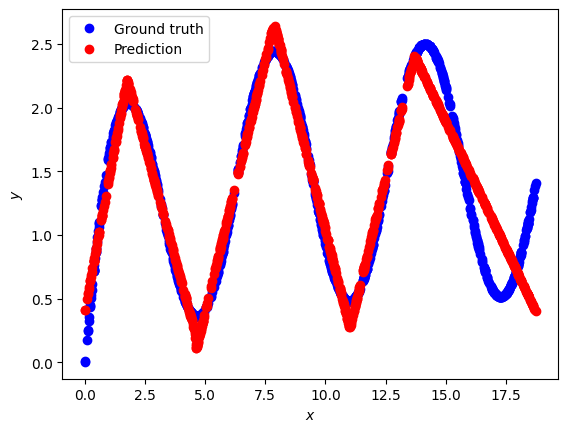

tensor(0.2211, grad_fn=<PowBackward0>)


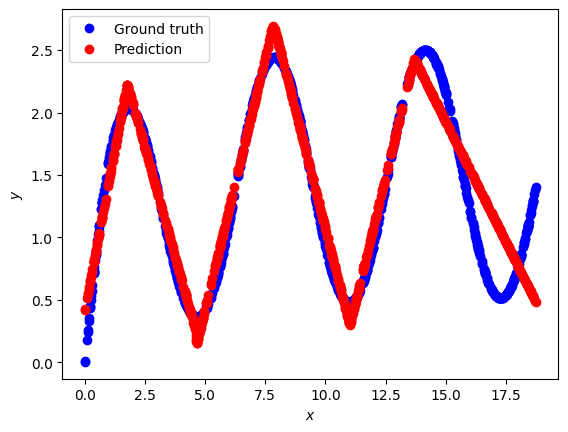

tensor(0.2165, grad_fn=<PowBackward0>)


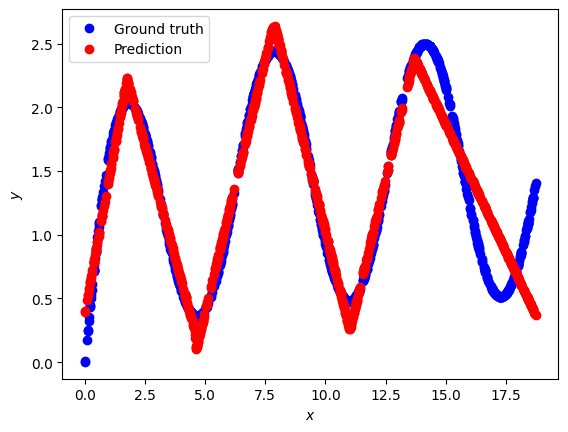

tensor(0.2164, grad_fn=<PowBackward0>)


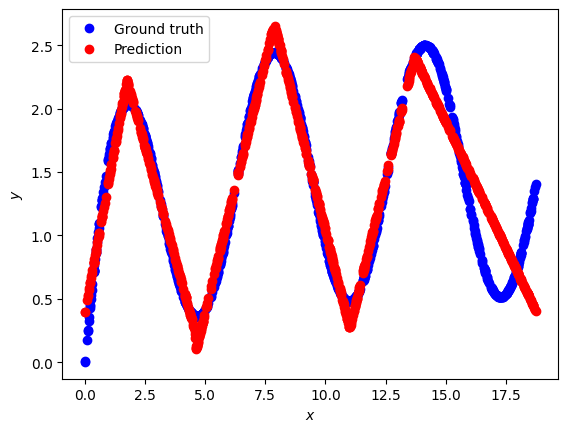

tensor(0.1046, grad_fn=<PowBackward0>)


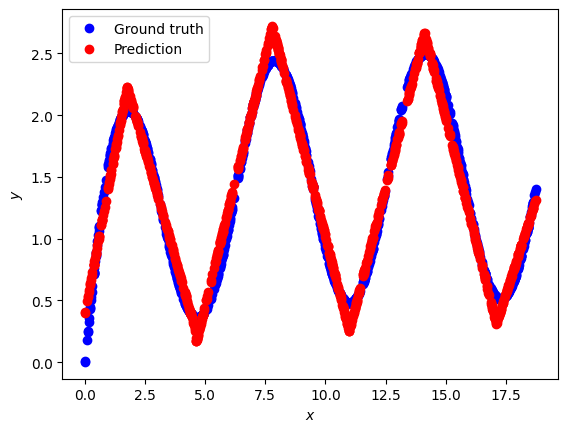

tensor(0.0941, grad_fn=<PowBackward0>)


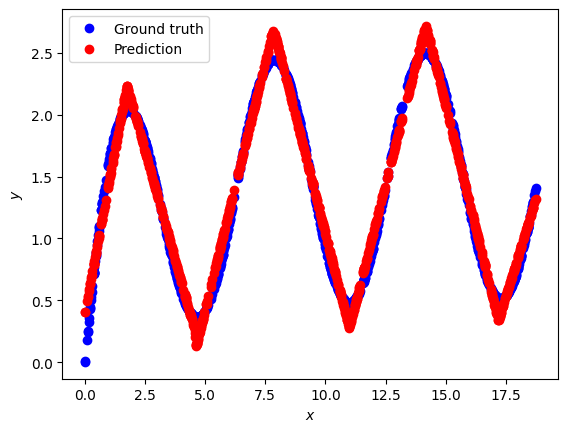

tensor(0.0937, grad_fn=<PowBackward0>)


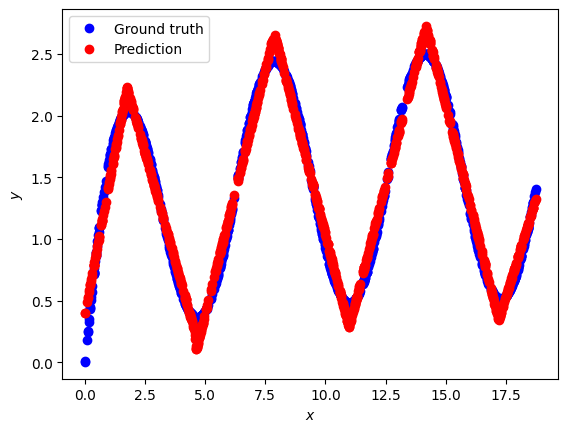

tensor(0.0935, grad_fn=<PowBackward0>)


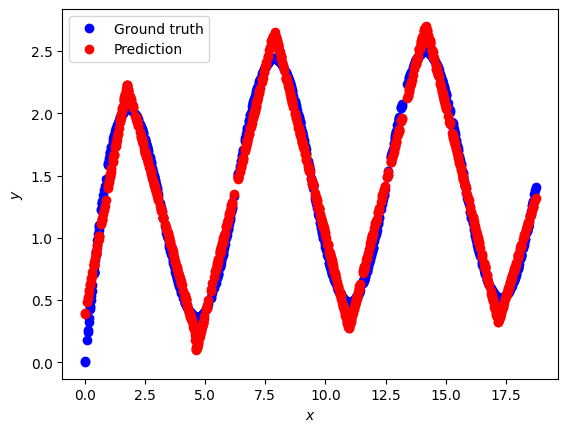

tensor(0.0936, grad_fn=<PowBackward0>)


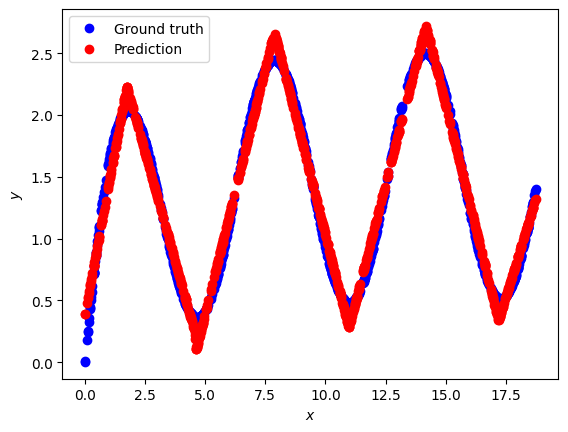

tensor(0.0940, grad_fn=<PowBackward0>)


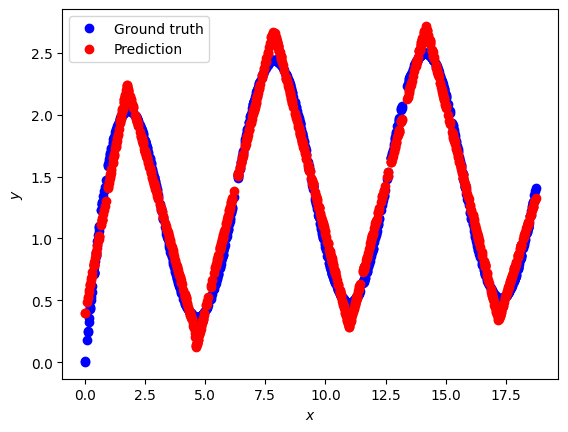

KeyboardInterrupt: 

In [30]:
relu_network = ReluNetwork(6)
optimizer = torch.optim.Adam(relu_network.parameters(), 0.02)
for i in range(100001):
    optimizer.zero_grad()
    y_pred = relu_network.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if(i%5000==0): #периодическое сохранение графиков
        y_pred = relu_network.forward(x_test)
        print((((y_pred-y_test)**2).mean())**0.5)
        predict(relu_network, x_test, y_test)
        plt.savefig("mygraph-%d-relu6.png"%i)
        plt.show()

tensor(2.0344, grad_fn=<PowBackward0>)


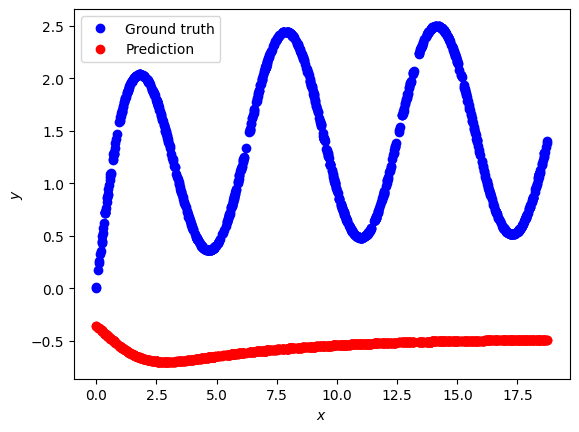

tensor(0.0736, grad_fn=<PowBackward0>)


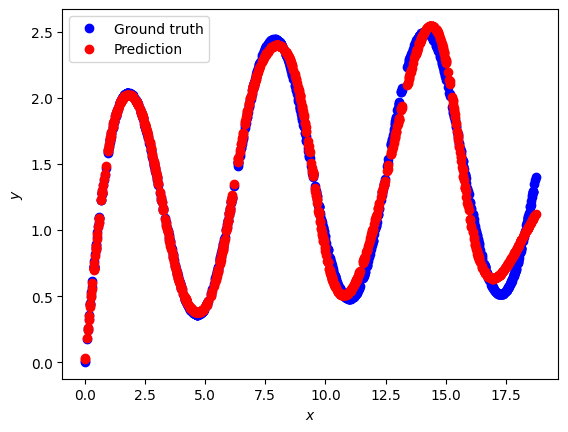

tensor(0.0565, grad_fn=<PowBackward0>)


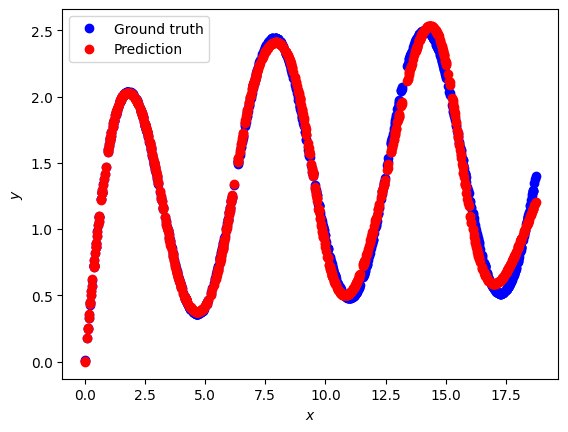

tensor(0.0477, grad_fn=<PowBackward0>)


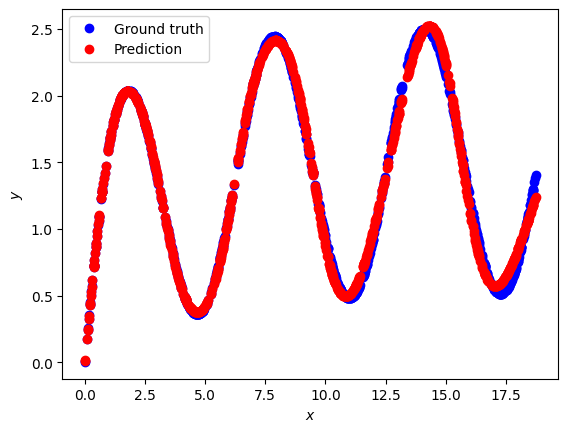

tensor(0.0475, grad_fn=<PowBackward0>)


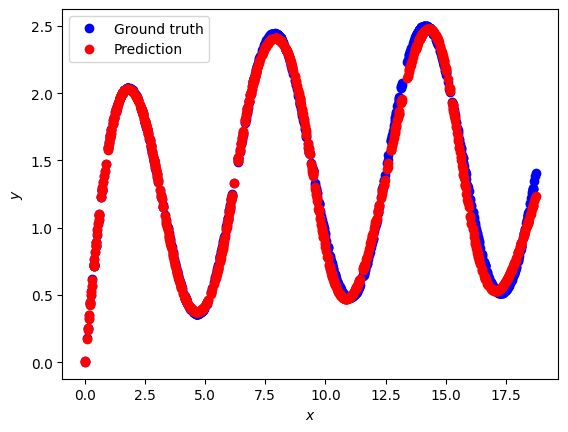

tensor(0.0390, grad_fn=<PowBackward0>)


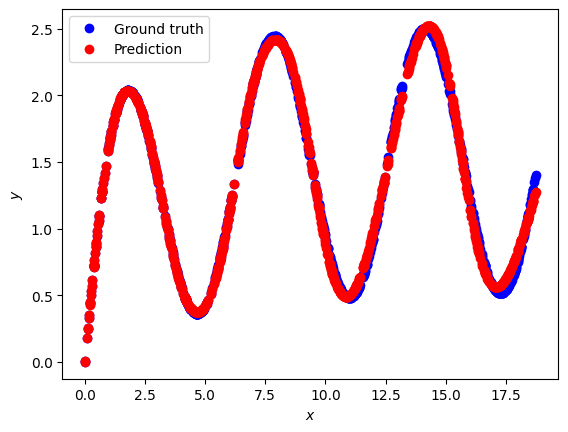

tensor(0.0398, grad_fn=<PowBackward0>)


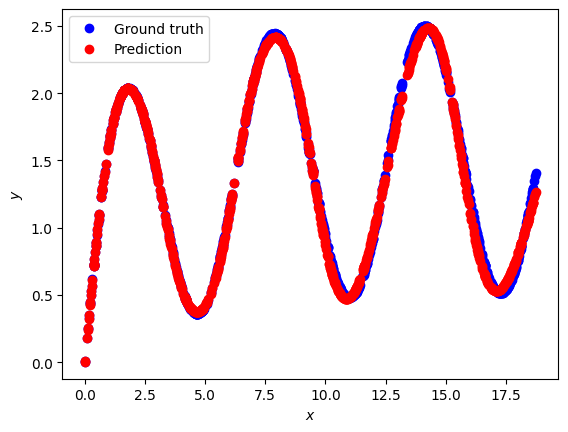

tensor(0.0356, grad_fn=<PowBackward0>)


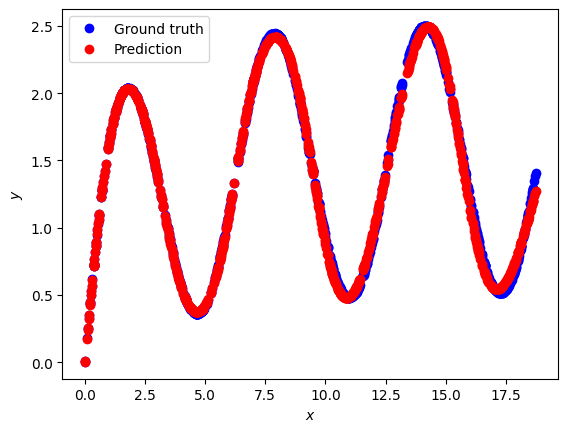

tensor(0.0333, grad_fn=<PowBackward0>)


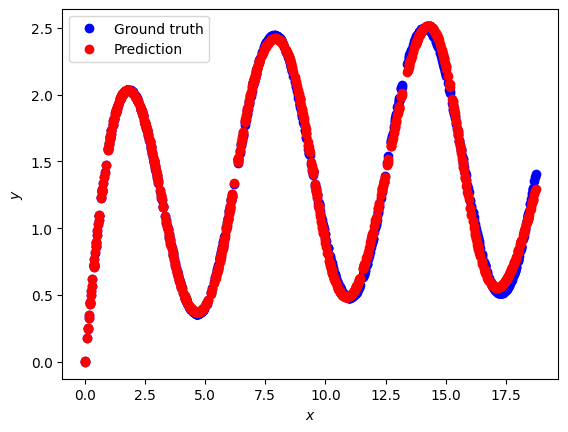

tensor(0.0322, grad_fn=<PowBackward0>)


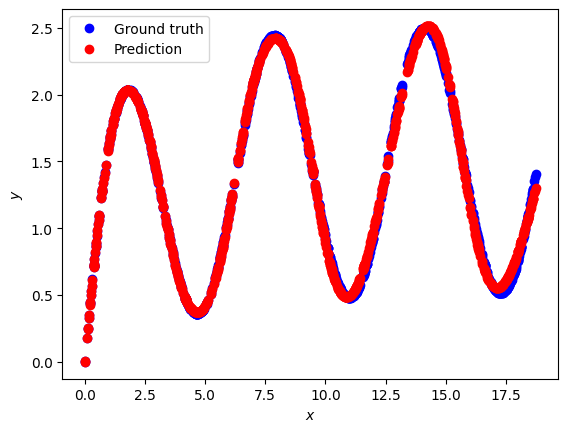

tensor(0.0313, grad_fn=<PowBackward0>)


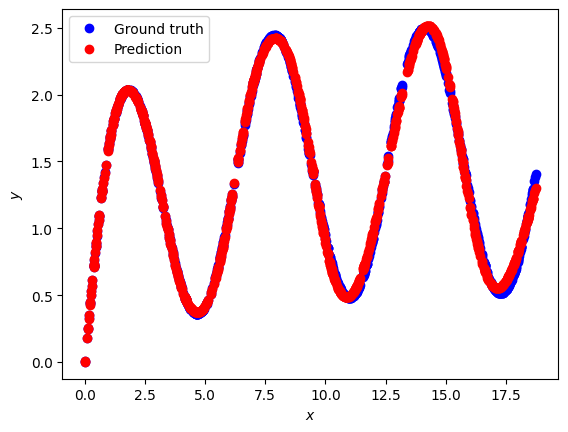

In [43]:
tanh_network = TanhNetwork(8)
optimizer = torch.optim.Adam(tanh_network.parameters(), 0.01)
for i in range(50001):
    optimizer.zero_grad()
    y_pred = tanh_network.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    if(i%5000==0): #периодическое сохранение графиков
        y_pred = tanh_network.forward(x_test)
        print((((y_pred-y_test)**2).mean())**0.5)
        predict(tanh_network, x_test, y_test)
        plt.savefig("mygraph-%d-tanh6.png"%i)
        plt.show()